# QCTO - Workplace Module

### Project Title: Contaminated River Water Parameters
#### Done By: Lebogang Letsoalo

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

<a href=#Eleven>11. Trello and Github link</a>

In [15]:
from IPython.display import display, HTML, Image

# Display the image in the center of the notebook
display(HTML('<center><img src=https://media.istockphoto.com/id/1390096829/photo/environment-engineer-collect-samples-of-wastewater-from-industrial-canals-in-test-tube-close.jpg?s=2048x2048&w=is&k=20&c=Cf_1pRlXeFtnAPwiQGbgWFHdBjYXwgp8qDPa_EI31nk= width="500" height="100"></center>'))


---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:**
The purpose of this project is to analyze the physico-chemical parameters of a polluted river located in Buenos Aires, with a focus on identifying trends, correlations, and potential health or environmental risks. The project aims to utilize data collected from various sampling points to better understand the pollution levels and their impacts on water quality.
  
* **Introduce:**
Water pollution is a significant environmental issue in many urban areas, including Buenos Aires, where industrial, agricultural, and domestic activities contribute to the contamination of nearby rivers. The physico-chemical parameters of river water, such as temperature, pH, electrical conductivity (EC), total dissolved solids (TDS), and total suspended solids (TSS), provide vital information about the water quality and its suitability for human consumption, aquatic life, and ecological health. By examining these parameters over time and across different locations, this project seeks to uncover patterns of contamination and inform potential mitigation strategies.

* **Objectives:**
Data exploration and cleaning: Data Exploration and Cleaning: Organize and clean the data, addressing any missing values or inconsistencies to ensure accurate analysis.
Trend Analysis: Analyze how key physico-chemical parameters such as pH, electrical conductivity, total dissolved solids, and total suspended solids change over time and across different sampling locations.
Correlation Study: Identify relationships between different environmental variables (e.g., temperature, humidity, and pH) and how they influence the river's contamination levels.
Predictive Modeling: Build models to predict water quality based on various environmental factors and sampling data.
Recommendations for Environmental Management: Provide actionable insights and recommendations for improving water quality, including identifying critical pollution sources and suggesting mitigation measures.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [14]:
#Please use code cells to code in and do not forget to comment your code.
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn

import plotly.express as px
import scipy
import winsound # -- Used specifically to notify when hour-long code finishes xD 

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---


### Project Details: Contaminated River Water Parameters Analysis

#### Dataset Overview
The dataset used for this analysis was sourced from Kaggle and is the result of a collaborative research effort by three university researchers from Argentina. The research team collected water samples from a widely known polluted river located in Buenos Aires. These samples were taken from various sampling points along the river, including **Puente_Bilbao**, **Puente_Irigoyen**, and **Puente_Falbo**, and analyzed in a chemistry laboratory to measure several physico-chemical parametenent.

The dataset has the following structure:

- **Columns**: 32
  - **Decimal values**: 14 columns (representing numerical values like temperature, pH, EC, TDS, and TSS).
  - **Integer values**: 10 columns (representing variables like time, sample counts, or other measurements).
  - **String values**: 6 columns (including sampling point names and other categorical data).

The data is **chronologically sorted**, ensuring that the time sequence of the samples is preserved. This enables the identification of trends and variations over time, which is crucial for analyzing changes in water quality and the impac of pollution.

#### Sampling Points
The dataset includes water samples collected from three key sampling points located along the river:
- **Puente_Bilbao**
- **Puente_Irigoyen**Arroyo_Las Torres and Arroyo_Salguero are sampling points of 2 different streams flowing into the river.
ewater quality in the river.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [15]:
#reading the data
df = pd.read_csv('archive/River_water parameters.csv')


In [16]:
#Print dataset
df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.7,200.0,SEMIDURA,117.0
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.6,196.0,SEMIDURA,117.0


In [17]:
#Print river water parameters dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

In [18]:
#check for missing values in each row 
df.isnull().sum()


Date (DD/MM/YYYY)            0
Time (24 hrs XX:XX)          0
Sampling point               0
Ambient temperature (°C)     0
Ambient humidity             0
Sample temperature (°C)      0
pH                           0
EC\n(µS/cm)                  0
TDS\n(mg/L)                  0
TSS\n(mL sed/L)              6
DO\n(mg/L)                   0
Level (cm)                  39
Turbidity (NTU)              1
Hardness\n(mg CaCO3/L)       2
Hardness classification      2
Total Cl-\n(mg Cl-/L)        6
dtype: int64

In [19]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(duplicates.head())

Empty DataFrame
Columns: [Date (DD/MM/YYYY), Time (24 hrs XX:XX), Sampling point, Ambient temperature (°C), Ambient humidity, Sample temperature (°C), pH, EC
(µS/cm), TDS
(mg/L), TSS
(mL sed/L), DO
(mg/L), Level (cm), Turbidity (NTU), Hardness
(mg CaCO3/L), Hardness classification, Total Cl-
(mg Cl-/L)]
Index: []


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [20]:
# Dropping the rows with small missing values
df = df.dropna(subset=['Turbidity (NTU)'])
df = df.dropna(subset=['Hardness\n(mg CaCO3/L)'])
df = df.dropna(subset=['Hardness classification'])
df = df.dropna(subset=['TSS\n(mL sed/L)'])
df = df.dropna(subset=['Total Cl-\n(mg Cl-/L)'])



In [21]:
# Calculate the mean of the 'Level (cm)' column, ignoring NaN values
mean_level = df['Level (cm)'].mean()

In [22]:
# Fill NaN values in the 'Level (cm)' column with the calculated mean
df['Level (cm)'] = df['Level (cm)'].fillna(mean_level)


In [23]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# reset the index after removing duplicates
df_cleaned = df_cleaned.reset_index(drop=True)

# Print the cleaned DataFrame
print(df_cleaned.head())

  Date (DD/MM/YYYY) Time (24 hrs XX:XX)     Sampling point  \
0        14/06/2023               14:30      Puente Bilbao   
1        14/06/2023               14:30      Puente Bilbao   
2        14/06/2023               15:00  Arroyo_Las Torres   
3        14/06/2023               15:00  Arroyo_Las Torres   
4        14/06/2023               15:00    Puente Irigoyen   

   Ambient temperature (°C)  Ambient humidity  Sample temperature (°C)   pH  \
0                      11.9              0.47                     13.0  8.1   
1                      11.9              0.47                     13.0  8.2   
2                      11.9              0.47                     13.0  8.3   
3                      11.9              0.47                     13.0  8.5   
4                      11.9              0.47                     13.0  8.2   

   EC\n(µS/cm)  TDS\n(mg/L)  TSS\n(mL sed/L)  DO\n(mg/L)  Level (cm)  \
0         1000          490             18.0        5.30   38.095238   
1       

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_cleaned[['Sampling point','Hardness classification']]) 
X.shape

NameError: name 'df_cleaned' is not defined

In [ ]:
!pip install scikit-learn

In [3]:
from sklearn.preprocessing import LabelEncoder
#sample data: categorical labels
categorical_cols= ['Sampling point','Hardness classification']
#Initialize the LabelEncoder
label_encoder= LabelEncoder()
# Create a dictionary to store original and encoded labels for each column
label_mapping = {}  

In [21]:
# 3. Fit and transform the data for each column
for col in categorical_cols:
    # Fit the encoder to the original labels
    label_encoder.fit(df_cleaned[col])  
    # Transform the original labels to encoded labels
    df_cleaned[col + '_encoded'] = label_encoder.transform(df_cleaned[col])  
    
    # Store the mapping in the dictionary
    label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))) 

In [22]:
# 4. Display the mapping (Original Labels --> Encoded Labels)
for column, mapping in label_mapping.items():
    print(f"Mapping for column: {column}")
    for original_label, encoded_label in mapping.items():
        print(f"  '{original_label}' --> {encoded_label}")
    print("\n")


# To see the updated DataFrame with encoded columns, run:
# df.head()

# 5. Inverse Transform (Encoded Labels --> Original Labels)
# (To convert encoded labels back to original labels):
# df['Sampling point'] = label_encoder.inverse_transform(df['Sampling point_encoded'])

Mapping for column: Sampling point
  'Arroyo Salguero' --> 0
  'Arroyo_Las Torres' --> 1
  'Puente Bilbao' --> 2
  'Puente Falbo' --> 3
  'Puente Irigoyen' --> 4


Mapping for column: Hardness classification
  'BLANDA' --> 0
  'SEMIDURA' --> 1




---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


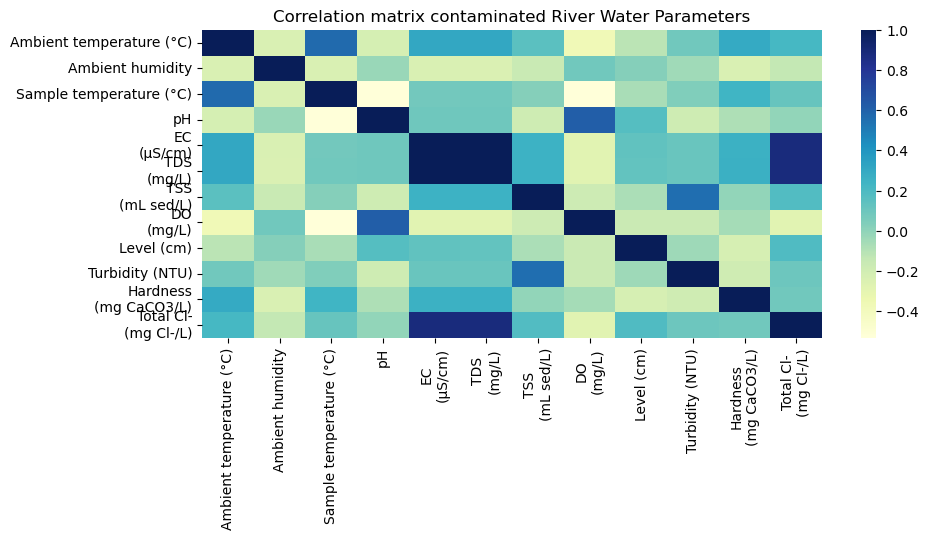

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', fmt=".2f")
plt.title('Correlation matrix contaminated River Water Parameters')
plt.show()

In [ ]:
# Set Figure Size: 
plt.figure(figsize=(12,8))

# Box Plot with Seaborn
sns.boxplot(data=df[['Bhindi (Ladies finger)','Tomato', 'Potato', 'Onion','Brinjal','Garlic','Peas','Green Chilli', 'Methi','Elephant Yam (Suran)']]) 

# Plot Titles and Labels:
plt.title('Box Plot of contaminated River Water Parameters
')
plt.ylabel('Price')
plt.xlabel('Vegetable')

plt.show()

In [26]:
columns_to_plot = ['Ambient temperature (˚C)', 'pH', 'EC (µS/cm)', 'TDS (mg/L)', 'Turbidity (NTU)', 'TSS\n(mL sed/L)']

# Loop through each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(df_cleaned[column], bins=20, edgecolor='k') # Adjust number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


KeyError: 'Ambient temperature (˚C)'

<Figure size 800x600 with 0 Axes>

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [40]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.


---
<a href=#ten></a>
## **Trello and Github**
<a href=#cont>Back to Table of Contents</a>

* **Trello:** https://trello.com/invite/b/67d7e7772b2861f27da83c33/ATTId86647883132da6673d4daf07089d5c1ED99E4A1/workplaceproject
* **Github:** https://github.com/LeboL-moriski/Capstone